# Machine Learning Engineer Nanodegree
## Capstone Project Report
Xi Palazzolo
September 28, 2018

In [32]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## I. Definition
***White Blood Cell***

All definitions are adopted from the National Cancer Institute. White blood cell is a type of blood cell that is made in the bone marrow and found in the blood and lymph tissue. White blood cells are part of the body’s immune system. They help the body fight infection and other diseases. Types of white blood cells are granulocytes (neutrophils, eosinophils, and basophils), monocytes, and lymphocytes (T cells and B cells). Checking the number of white blood cells in the blood is usually part of a complete blood cell (CBC) test. It may be used to look for conditions such as infection, inflammation, allergies, and leukemia. Also called leukocyte and WBC.
- **Granulocytes**
    - Neutrophil: A type of immune cell that is one of the first cell types to travel to the site of an infection. Neutrophils help fight infection by ingesting microorganisms and releasing enzymes that kill the microorganisms.            
                
    - Eosinophil: A type of immune cell that has granules (small particles) with enzymes that are released during infections, allergic reactions, and asthma.   
                  
    - Basophil (will not be included for classification in this project): A type of immune cell that has granules (small particles) with enzymes that are released during allergic reactions and asthma.   
    
                    
- **Monocytes**

A type of immune cell that is made in the bone marrow and travels through the blood to tissues in the body where it becomes a macrophage. Macrophages surround and kill microorganisms, ingest foreign material, remove dead cells, and boost immune responses. A monocyte is a type of white blood cell and a type of phagocyte.    

- **Lymphocytes**

A type of immune cell that is made in the bone marrow and is found in the blood and in lymph tissue. The two main types of lymphocytes are B lymphocytes and T lymphocytes. B lymphocytes make antibodies, and T lymphocytes help kill tumor cells and help control immune responses. 

<img src='whitecells.png'>

### Project Overview

White blood cell (WBC) differenciation plays an important role in clinical procedures that provides invaluable information to medical professionals for diagnose diseases in patients. Many blood diseases such as leukemia, acquired immunodeficiency syndrome (AIDS), or cancers can be diagonsed by processing the white blood cell differencial counts, ie., the counts of different cell classes (Theera-Umpon and Dhompongsa, 2007). Cell classification has widespread interest especially for clinics and laboratories. For example, patient’s blood cells
counting is use to extract information about other cells that are not normally present in peripheral blood but may be released in certain disease processes by the hematologists. One of the great challenge to engineer especially biomedical engineer is to transform this human practical task into computer based which the system is comparable to human performance or better. Thus, the system must be stable and able to handle the uncertainty. Up to now, automatic cell classification systems can not meet the complexity of real clinical demands.

Most of the proposed automatic techniques follow the traditional manual process of detecting a cell, extracting its features, classifying the cell, and then updating the counts. Ritter et al. presented a fully automatic method for segmentation and border identification of all objects that do not overlap the boundary in an image taken from a peripheral blood smear slide. In their work, pale tips of protuberances are lost. Ongun et al. did segmentation by morphological preprocessing followed by the snake-balloon algorithm. Jiang et al. proposed a WBC segmentation scheme on color space images using feature space clustering techniques, scale-space filtering for nucleus extraction, and watershed clustering for cytoplasm extraction. Leyza et al. used morphological operators and examined the scale-space properties of toggle operator to improve segmentation accuracy. Scotti presented the automatic morphological method that is based on the morphological analysis of WBCs. Their proposed system extracts the morphological indexes (lymphocytes). Kumar et al. used teager energy operator for segmentation, nucleus based on the edges, which are detected effectively by teager energy operator but it required at least a weak edge to exist between red blood cell (RBC) and the background. 

At the personal level, the motivation for this project came from my background in veterinary medicine. I was practicing as a veterinarian before changing my career path to data science. My former experience in clinical practices often involved blood cell classification on a daily basis, which was quite time-consuming and tedious. Therefore, I feel that if there is an algorithm built into a microscope that can greatly enhance diagosis.



### Problem Statement

Traditionally, blood cell classification is a rather complicated and frequently burdensome process. Patient’s blood cells counting were performed manually by medical technologists by viewing slide prepared with blood sample of the patient under microscope. A manual count will also give information about other cells that are not normally present in peripheral blood but might be released in certain disease. Unfortunately, the accuracy of cell classification and counting is strongly affected by individual operator’s capabilities. In particular, the identification and differential count of blood’s cell is a timeconsuming and repetitive task that can be influenced by operator’s accuracy and tiredness (Adollah et al., 2008). Thus, an automated counting system or algorithm is highly desired to help support such diagnostic procedures, which if effective, could potentially reduce cost and provide more timely information for patients' diagnosis and prognosis. This problem can be measured by the accuracy of the classification of cell classes: Eosinophil, Lymphocyte, Monocyte, and Neutrophil.

### Metrics

Accuracy classfication score will be used to evaluate the performance of the model. Specifically, the accuracy_score function from sklearn.metrics will be used. 

The accuracy_score function computes the accuracy, either the fraction (default) or the count (normalize=False) of correct predictions.In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.If  is the predicted value of the -th sample and  is the corresponding true value, then the fraction of correct predictions over  is defined as

<img src='accuracy_score_formula.png'>

where  is the indicator function. In this project, the main goal is to correctly classify input images to the appropriate categories. That means, the performance of the classifier would be the number of images that it correctly classifies. Therefore, accuracy score would be the optimal choice of metric to be used for evaluating the performance of the classifier. 

## II. Analysis

### Data

The dataset used in this project is a publicly available dataset (https://www.kaggle.c-om/paultimothymooney/blood-cells/data), originated from the BCCD dataset (retrieved from https://github.com/Shenggan/BCCD_Dataset).The BCCD dataset is a small-scale dataset for blood cell detection. The latter dataset contains 12,500 augmented images of blood cells (JPEG) with accompanying cell type labels (CSV). This dataset is accompanied by an additional dataset containing the original 410 images (pre-augmentation) as well as two additional subtype labels (WBC vs WBC) and also bounding boxes for each cell in each of these 410 images (JPEG + XML metadata). Each original image of the BCCD dataset is of size 640 x 480. After augmentation, each image is of size 120 x 160 so I can train the model faster.

The dataset obtained from Kaggle comprises of training and test sets, including 9,957 training and 2,487 testing images. In the training set, there are 
- 2,497 eosinophil cell images, 
- 2,483 lymphocyte cell images, 
- 2,478 monocyte cell images, and 
- 2,499 neutrophil cell images.

In the testing set, there are 
- 623 eosinophil cell images, 
- 620 lymphocyte cell images, 
- 620 monocyte cell images, and 
- 624 neutrophil cell images.

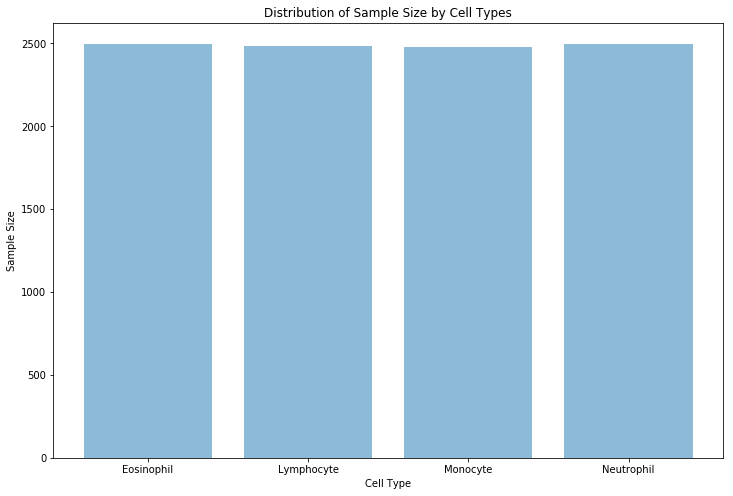

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 


set_1 = {'Cell_Type': ['Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'], 
         'Sample_Size': [2497, 2483, 2478, 2499]}

data = pd.DataFrame(set_1)
plt.figure(figsize=(12, 8))
plt.bar(data.Cell_Type, data.Sample_Size, align = 'center', alpha = 0.5)
plt.xlabel('Cell Type')
plt.ylabel('Sample Size')
plt.title('Distribution of Sample Size by Cell Types')
plt.show()

The above bar chart shows the distribution of the training dataset by cell types, which indicates a quite balance among cell types. A balanced training dataset in a classification problem can avoid a permanent definition bias. However, whether or not to balance a training dataset also depends on the main goal of the classification problem. For example, if my goal is to identify lymphocyte, then I should add in more lymphocyte images in the training dataset. 

**Examples of the Dataset**

<img src="Neutrophil.png">

### Algorithm and Techniques 

One algorithmatic solution to this problem is through the use of convolutional neural network (CNN). CNNs are models proposed by the development of biotechnology. Neurons are like local filtering of the entire input space, and they are well-organized together to achieve an understanding of the image in the entire field of view. CNN may extract the local and deep features of the input image. The performance of this model can be measured by its classification accuracy. 

***Algorithms Used***
- Transfer Learning is used in this project to solve the proposed problem. In Transfer Learning, the knowledge of an already trained Machine Learning model is applied to a different but related problem. The general idea is to use knowledge, that a model has learned from a task where a lot of labeled training data is available, in a new task where we don’t have a lot of data. Instead of starting the learning process from scratch, you start from patterns that have been learned from solving a related task (Niklas Donges, 2018). For example, in computer vision, Neural Networks usually try to detect edges in their earlier layers, shapes in their middle layer and some task-specific features in the later layers. With transfer learning, you use the early and middle layers and only re-train the latter layers. It helps us to leverage the labeled data of the task it was initially trained on. So in this project, by using pre-trained models, the classifiers would be able to identify the object in our data--cells. What I needed to do was to train the latter layers to classifier its type. 

-  VGG-16: VGG-16 is trained using ImageNet data and is characterized by its simplicity, using only 3×3 convolutional layers stacked on top of each other in increasing depth. Reducing volume size is handled by max pooling. Two fully-connected layers, each with 4,096 nodes are then followed by a softmax classifier. This model has 16 weight layers.

- Inception V3: The goal of the inception module is to act as a “multi-level feature extractor” by computing 1×1, 3×3, and 5×5 convolutions within the same module of the network — the output of these filters are then stacked along the channel dimension and before being fed into the next layer in the network. The original incarnation of this architecture was called GoogLeNet, but subsequent manifestations have simply been called Inception vN where N refers to the version number put out by Google.

- Xception: Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions. The original publication, Xception: Deep Learning with Depthwise Separable Convolutions can be found here.

***Techniques Used***
- Data Splitting: Usually, if a dataset is large enough, I split it into three parts--training, validation, and test. In this project, I used sklearn.model_selection.train_test_split modul to split my training data into training and validation. One important parameter here is the ratio, test_size. The common ratio is 0.3 or 0.33. 

- Data Pre-Processing: Every pre-trained CNN model has its default input size. Also, image  Therefore, I pre-processed all input images as the first step. Images were loaded and converted into a 4D array. Then each image was rescaled by dividing every pixel by 255.  

- Image Augmentation: This is an important step in image classification problems. However, this technique was not performed in this project since the dataset has already been augmented. Usually, I would create a image generator to rotate and flip an image by a set angle using ImageDataGenerator. Important parameters include rotation_range--the degree of rotation and horizontal_shift.  

- Feature Extraction: In this section, I used selected pre-trained models to detect and isolate the desired shapes (features) of the inpute images--cell images used for later training. 

- Build the Model Architecture: In all of my models, there are three layers--pre-trained CNN layer, convolutional layer, pool layer, and a fully-connected layer. In the convolutional layer, ReLu activation method was selected. An activation function is just like a weight function, calculating a “weighted sum” of its input, adding a bias and then deciding whether a neuron should be “fired” or not. ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations and therefore is selected in this project. Another parameter to pay attention is the input_shape. One needs to ensure the input_shape equal to the input_shape of the pre-process dataset. In the last layer-the fully connected layer, I used 'softmax' as the activation method, which would give out probability of each output. 

- Model Compiling: This is a technique to commision the model. An important parameter is the loss function and optimizer. Since this project handles a classification problem, 'categorical_crossentropy' loss function was used in the model. Because RMSprop divides the learning rate by an exponentially decaying average of squared gradients and was selected as the method for optimizing the model. As well, I added Dropout layer to avoid overfitting. 




### Benchmark

In 2018, Liang and his colleagues published a model classifying white blood cell classes using the same datasets. In their research, they propose an architecture that combines CNN and recurrent neural network (RNN). According to Liang et al., RNNs are a neural network used to process sequence data. In the traditional neural network model, from the input layer to the hidden layer to the output layer, the layers are connected with each other, and the nodes between each layer are connected. Such network model cannot handle this kind of sequential data. Socher et al. (2012a) presented a convolutional-recursive deep model for 3D object classification that combined the convolutional and recurrent neural networks (CNN and RNN) together. The CNN layer learns low-level translation invariant features and then uses it as input to multiple fixed-tree RNNs to form higher order features. RNNs can be seen as combining convolution and pooling into one efficient, hierarchical operation. Kim et al.described a model that employed a convolutional neural network (CNN) and a highway network over characters, whose output is given to a long shortterm memory (LSTM) recurrent neural network language model (RNN-LM). These two models both obtain better results compared to a-priori methods.

Liang et al.'s model consists of the following parts: Pre-trained convolutional neural network layer, RNN layer, Merge layer, and fully connected layer with Softmax output. This model integrates the local features extracted from the CNN and the features obtained from the RNN to perform the blood cell classification. They used the CNN model pre-trained on the ImageNet dataset and retains its weight parameters. Liang and colleagues perceived the CNN and RNN as two separate branches. First, they freezed the pre-trained CNN model, used the pre-processed training data as the input of the RNN model, extract and save the obtained features, and merge the features from the RNN and CNN. The RNN weight parameters were constantly updated during training. Finally, they thawed all network layers and use the training data as input to the CNN model and the RNN model. In the CNN model, they applied different size and weight matrix windows in order to generate multiple feature maps. The features extracted from the RNN model and the features extracted from the CNN model are combined according to the corresponding element multiplication methods. And then, the classification results were displayed using Softmax. In addition, they also used a fine-tuning strategy to retrain the CNN-RNN framework, and finally obtained the classification results. Accuracy score was used to evaluate the performance of this model.

## III. Methodology

### Data Preprocessing

The dataset used in this project contains pre-augmented images of white blood cells of 320 X 240 X 3 pixels. When using TensorFlow as backend, Keras CNNs require a 4D array (which is also refer to as a 4D tensor) as input, with shape

                                        (nb_samples,rows,columns,channels),

where nb_samples corresponds to the total number of images (or samples), and rows, columns, and channels correspond to the number of rows, columns, and channels for each image, respectively.

The path_to_tensor function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN. The function first loads the image and resizes it to a square image that is  224×224  pixels. Next, the image is converted to an array, which is then resized to a 4D tensor. In this case, since we are working with color images, each image has three channels. Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

                                                    (1,224,224,3).
                                                    
As well, each image was rescale by dividing every pixel in every image by 255.

### Implementation 

In my model, there are four layers: 

1) Pre-trained CNN Layer

I will use the weight parameters obtained by pre-training on the ImageNet dataset as the initialization weights of my CNN model. CNNs include convolutional layer and pooling layer.

2) Convolutional Layer

As the most important part of the convolutional neural network, the main way to calculate this layer is to use convolution windows with different sizes in order to perform convolution operations with the feature maps of the previous layer. Convolution windows of different sizes slide in sequence onto the feature map of the previous layer. The window size is usually 3×3 or 5×5, and the number of weight parameters of the convolutional layer also changes accordingly. The values of the neurons on each feature map in the convolutional layer are convoluted through corresponding windows, and then the final result is obtained based on the excitation function used in the layer. In the convolutional layer, ReLu activation method was selected. An activation function is just like a weight function, calculating a “weighted sum” of its input, adding a bias and then deciding whether a neuron should be “fired” or not. ReLu is less computationally expensive than tanh and sigmoid because it involves simpler mathematical operations and therefore is selected in this project. Another parameter to pay attention is the input_shape. One needs to ensure the input_shape equal to the input_shape of the pre-process dataset.

3) Pool Layer

The calculation process of this layer is similar to the operation of the convolutional layer. The difference is that the sliding window of the lower sampling layer is usually 2 × 2, and the sliding step is 2. Therefore, this process will usually halved the feature map of the size of the previous layer, which to a large extent can greatly reduce the convolution weights of neural network parameters, the number of there are very good for the overall speed of the network training process to promote. At the same time, it also enables the network to become more adaptive to the scale of the image changes. In this project, I select the pre-train model -- Xception, and I will use the ReLU (Linear Rectification Function) as my activation function. Xception is another improved model of Google’s Inception v3. It mainly implements depthwise separable convolution to replace the original convolution operation in Inception v3. Xception, as an improved model for Inception v3, mainly introduces depthwise separable convolution on the basis of Inception v3, which improves the model’s effect without increasing network complexity. In this layer, global average pooling (GAP) method was selected to minimize overfitting by reducing the total number of parameters in the model. GAP layers are used to reduce the spatial dimensions of a three-dimensional tensor. In addition, GAP layers perform a more extreme type of dimensionality reduction, where a tensor with dimensions h×w×d is reduced in size to have dimensions 1×1×d. GAP layers reduce each h×w feature map to a single number by simply taking the average of all hw values.

4) Fully Connected Layer with Softmax Output

After features are generated by CNN layer, I will pass them to the fully connected Softmax layer, the output of which is the probability distribution of all classes. In addition, I will use the cross-entropy as a loss function to measure the difference between the actual output and the target output. In addition, a dropout layer is also added to reduce overfitting. 

During the coding process, at first I didn't notice the input_shape not being consistent which causing the model not being able to compile. After making sure all input_shape being consistent, I was able to compile the models without any other complications. 

### Refinement

In the training process, I refined the number of epochs trained in each model based on the training accuracy score. At first, I defaulted all training epochs to 50, where not all models achieved an ideal accuracy score. By printing out the accuracy score against each epoch, I was able to observe the changes in the score. Therefore, I ajusted the number of epochs for each model in order to achieve the highest accuracy score possible. 

## IV. Results

### Model Architecture and Results

***VGG-16 Model Architecture***
<img src='vgg16_model.png'>

***VGG_16 Results***

<img src='vgg_16_result.png'>
<img src='vgg_loss.png'>

From the graphs above, the VGG-16 accuracy score pattern matches the loss pattern where its test set achieved higher accuracy score than training set and in the reverse pattern in the loss. 

***Xception Model Architecture***
<img src='xception_model.png'>

***Xception Results***
<img src='xception_result.png'>
<img src='xception_loss.png'>

From the charts above, I noticed that although the Xception model had higher accuracy score in the training set, its testing accuracy score however was lower while having higher loss. 

***Inception V3 Model Architecture***
<img src='inception_model.png'>

***Inception V3 Results***
<img src='inception_result.png'>
<img src='inception_loss.png'>

From the above charts above, Inception V3 had the worst performance in both accuracy score and loss. 

### Model Evaluation and Validation 

The accuracy and model loss were used to compare the performance of models built with three pre-trained CNN models--VGG16, Xception, and Inception V3. It turned out model built with VGG-16 returned the highest testing accuracy rate and the lowest model loss. 

### Justification 

The result in this application was different than that of the benchmark model, where the model built with Xception achieved the highest accuracy rate. One main reason attributing to such variance in the result is the architecture of models. In the benchmark model, the authors froze the CNN pre-trained model while adding a layer of recurrent neural network that further enhanced the performance of the model. In this application, only CNN was used in the architecture. The highest testing accuracy rate achieved in this application was by VGG-16 of 60.43%. Because this was for clinical diagnostic use, a higher accuracy rate was expected. Further modications are requred to obtain a more confident classifier. 

## V. Conclusion

<img src='accuracy_score_performance.png'>

Above is a comparison of training and testing accuracy scores among three different models. Of these, Inception V3 had the lowest training and testing accuracy scores while seemingly volatile. Interestingly, different than the result of the benchmark model, in this project, VGG-16 achieved the highest test accuracy score, although the training accuracy score was not high. Although Xception achieved the highest training accuracy score, its test accuracy score was not as expected. 

<img src='model_loss_performance.png'>

In this project, categorical cross entropy is used as the loss function. Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. A perfect model would have a log loss of 0. Above is a comparison of model losses among three different models. Similar to their performance in accuracy score, VGG-16 is the best performer in test data while Xception performed best in training data. 

### Reflection 

For this white blood cell classification problem, before diving into the actual training and testing process, I first imported and pre-processed the dataset like many other image recognition problem processes do. The normal process includes image dimension processing, image rescaling, and image augmentation. But since the dataset I used in this project already contains augemented images, I did not conduct image augmentation in the pre-processing. Secondly, I split the dataset into training, validation, and testing sets. Then, I extracted bottleneck features using pre-trained CNN models and fitted them to the dataset. Next, I developed the architecture of my CNN models using three different pre-trained CNN models. In the process of training my models, I observed and tuned the number of training epochs based on the resulting training accuracy and model loss values. After that, the models were put to test using the testing dataset. In order to compare and evaluate the performance of these three models, I visualized their accuracy scores and model loss values throughout all epochs. 

One interesting and difficult part of the project was adjusting the number of training epochs. I noticed that higher number of training epochs did not always correlate with higher training accuracy. 

The final solution of my choice of pre-trained model (Xception) did not really achieve my expectation because it under-performed compared to VGG-16. However, I think that with further refinements, this classifier can be used to broader cell classifications such as platelets, sickle cells, and even tumor cells. With this software-first approach to morphology, I think we can apply Machine Learning to healthcare in a meaningful, valuable way. Most importantly I hope that we can enable:

- Faster iteration cycles and improvements (as with all software).
- Increased accessibility to high quality, quantitative assessments.
- Lower costs and better patient outcomes.

### Improvement 

I think the algorithm and the architecture of the model can be further refined as suggested in the benchmark model. As indicated by the authors of the benchmark model, the incorporation of CNN pre-trained model and RNN can greatly enhance the accuracy of the classifier. As well, in the pre-trained CNN model, they used the pre-processed training data as the input of the RNN model, extract and save the obtained features, and merge the features from the RNN and CNN. The RNN weight parameters were constantly updated during training. Finally, they thawed all network layers and use the training data as input to the CNN model and the RNN model. In the CNN model, they applied different size and weight matrix windows in order to generate multiple feature maps. The features extracted from the RNN model and the features extracted from the CNN model are combined according to the corresponding element multiplication methods. These are the things that can be improved in my model to further enhance the performance of the classifier. 

### References 

- Adollah R., Mashor M.Y., Mohd Nasir N.F., Rosline H., Mahsin H., Adilah H. 2008. Blood Cell Image Segmentation: A Review. In: Abu Osman N.A., Ibrahim F., Wan Abas W.A.B., Abdul Rahman H.S., Ting HN. (eds) 4th Kuala Lumpur International Conference on Biomedical Engineering 2008. IFMBE Proceedings, vol 21. Springer, Berlin, Heidelberg.

- Dorini LB, Minetto R, Leite NJ: White blood cell segmentation using morphological operators and scale-space analysis. 2007. SIBGRAPI '07: Proceedings of the XX Brazilian Symposium on Computer Graphics and Image Processing. 

- Jiang Kan, Liao Qing-Min, Dai Sheng-Yang: A novel white blood cell segmentation scheme using scale-space filtering and watershed clustering. Machine Learning and Cybernetics, 2003 International Conference on. 2003, 5: 2820-2825.

- Kim Y, Y. Jernite, D. Sontag, and A. M. Rush. 2015. Character-aware neural language models. Computer Science.

- Kumar BR, Joseph DK, Sreenivasc TV. 2002. Teager energy based blood cell segmentation. Digital Signal Processing. DSP 2002 14th International Conference on. 2: 619-622.

- GAOBO LIANG , HUICHAO HONG, WEIFANG XIE, AND LIXIN ZHENG. 2018. Combining Convolutional Neural Network With Recursive Neural Network for Blood Cell Image Classification. Institute of Electrical and Electronics Engineers. 6: 36188-36197. 

- National Cancer Institute. Last accessed on August 10, 2018: https://www.cancer.gov/publications/dictionaries/cancer-terms/def/white-blood-cell

- Nipon Theera-Umpon and Sompong Dhompongsa. 2007. Morphological Granulometric Features of Nucleus in Automatic Bone Marrow White Blood Cell Classification. IEEE TRANSACTIONS ON INFORMATION TECHNOLOGY IN BIOMEDICINE, VOL. 11, NO. 3.

- Niklas Donges, 2018. Transfer Learning. Retrieved from: https://towardsdatascience.com/transfer-learning-946518f95666

- Ongun G, Halici U, Leblebicioglu K, Atalay V, Beksac M, Beksac S. 2001. Feature extraction and classification of blood cells for an automated differential blood count system. Neural Networks. Proceedings. IJCNN '01. International Joint Conference on. 4: 2461-2466.

- Ritter N, Cooper J. 2007. Segmentation and border identification of cells in images of peripheral blood smear slides. Proceedings of the Thirtieth Australasian Conference on Computer Science. 62: 161-169.

-  Socher R, B. Huval, B. Bath, C. D. Manning, and A. Y. Ng. 2012. Convolutional-recursive deep learning for 3D object classification. Proceedings of Neural Information Processing Systems. 656–664.

- Scotti F. 2005. Automatic morphological analysis for acute leukemia identification in peripheral blood microscope images. 2005 IEEE International Conference on Computational Intelligence for Measurement Systems and Applications, CIMSA, 96-101.